# Trabajo final - Empujes sobre una presa de concreto

**Estudiantes:** Keren Mejía y Oscar Rincón

**Profesor:** Camilo Valencia

**Curso:** Mecánica de medios continuos avanzada

###  Librerías requeridas

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from subprocess import call
import matplotlib.cm as cm
from matplotlib import rc
import matplotlib as mpl
import seaborn as sns 
from matplotlib.colors import ListedColormap

from scipy.optimize import minimize
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "DejaVu Serif",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)

Graficar los esfuerzos sobre la presa. Los tres esfuerzos se visualizan de manera independiente. Ayuda: las gráficas finales debe parecerse a las presentadas en la figura 4.12 de las notas de clase.

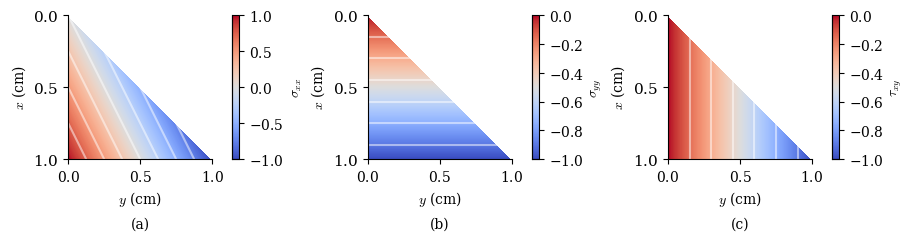

In [3]:
# Funciones para calcular los esfuerzos
def sigma_xx(gamma, x, y):
    return gamma * x - 2 * gamma * y

def sigma_yy(gamma, x):
    return -gamma * x

def tau_xy(gamma, y):
    return -gamma * y

# Definir el valor de gamma
gamma = 1.0

# Definir las coordenadas de los puntos del triángulo
points = [(0, 0), (1, 0), (1, 1)]

# Funciones para verificar si un punto está dentro del triángulo
def inside_triangle(x, y):
    return 0 <= x <= y and 0 <= y <= 1

# Crear una malla de puntos dentro del triángulo con una mayor resolución
x_values = np.linspace(0, 1, 1000)
y_values = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x_values, y_values)

# Crear una máscara booleana para ocultar los valores fuera del triángulo
mask = ~np.vectorize(inside_triangle)(X, Y)

# Calcular los valores de los esfuerzos en todos los puntos de la malla
Z_sigma_xx = sigma_xx(gamma, Y, X)
Z_sigma_yy = sigma_yy(gamma, Y)
Z_tau_xy = tau_xy(gamma, X)

# Aplicar la máscara a los valores de los esfuerzos
Z_sigma_xx[mask] = np.nan
Z_sigma_yy[mask] = np.nan
Z_tau_xy[mask] = np.nan

# Graficar los esfuerzos
plt.figure(figsize=(9, 2.3))
plt.subplot(1, 3, 1)
plt.imshow(Z_sigma_xx, cmap='coolwarm', origin='lower', extent=(0, 1, 0, 1))
plt.colorbar(label=r'$\sigma_{xx}$')
plt.contour(X, Y, Z_sigma_xx, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r"$y$ (cm)")
plt.ylabel(r"$x$ (cm)")
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.45, "(a)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()

plt.subplot(1, 3, 2)
plt.imshow(Z_sigma_yy, cmap='coolwarm', origin='lower', extent=(0, 1, 0, 1))
plt.colorbar(label=r'$\sigma_{yy}$')
plt.contour(X, Y, Z_sigma_yy, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r"$y$ (cm)")
plt.ylabel(r"$x$ (cm)")
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.45, "(b)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()

plt.subplot(1, 3, 3)
plt.imshow(Z_tau_xy, cmap='coolwarm', origin='lower', extent=(0, 1, 0, 1))
plt.colorbar(label=r'$\tau_{xy}$')
plt.contour(X, Y, Z_tau_xy, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r"$y$ (cm)")
plt.ylabel(r"$x$ (cm)")
sns.despine()
#plt.tight_layout()
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.45, "(c)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
plt.savefig("esfuerzos.svg", format="svg", dpi=300)
plt.show()

Calcular los esfuerzos máximos (compresión, tracción y cortante) y su ubicación en la presa.

In [4]:
def sigma_1(Y, X, gamma):
    return -gamma * (Y + np.sqrt(X**2 - 2*X*Y  + 2*Y**2))

def sigma_2(Y, X, gamma):
    return gamma * (np.sqrt(X**2 - 2*X*Y  + 2*Y**2) - Y)

def tau_max(Y, X, gamma):
    return gamma * np.sqrt(X**2 - 2*X*Y + 2*Y**2)

# Crear una malla de puntos dentro del triángulo con una mayor resolución
x_values = np.linspace(0, 1, 1000)
y_values = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x_values, y_values)
# Definir el valor de gamma
gamma = 1.0
# Calcular los valores de los esfuerzos en todos los puntos de la malla
Z_sigma_1 = sigma_1(X, Y, gamma)
Z_sigma_2 = sigma_2(X, Y, gamma)
Z_tau_max = tau_max(X, Y, gamma)
# Aplicar la máscara a los valores de los esfuerzos
Z_sigma_1[mask] = np.nan
Z_sigma_2[mask] = np.nan
Z_tau_max[mask] = np.nan

In [5]:
min_sigma_1 = np.nanmin(Z_sigma_1)
min_indices_sigma_1 = np.where(Z_sigma_1 == min_sigma_1)
min_coords_sigma_1 = list(zip(X[min_indices_sigma_1], Y[min_indices_sigma_1]))

print("Coordenadas donde Z_sigma_1 es mínimo:")
for coords in min_coords_sigma_1:
    print(coords)
print("Valor minimo de Z_sigma_1:", min_sigma_1)

Coordenadas donde Z_sigma_1 es mínimo:
(1.0, 1.0)
Valor minimo de Z_sigma_1: -2.0


In [6]:
max_sigma_2 = np.nanmax(Z_sigma_2)
max_indices_sigma_2 = np.where(Z_sigma_2 == max_sigma_2)
max_coords_sigma_2 = list(zip(X[max_indices_sigma_2], Y[max_indices_sigma_2]))

print("Coordenadas donde Z_sigma_2 es máximo:")
for coords in max_coords_sigma_2:
    print(coords)
print("Valor máximo de Z_sigma_2:", max_sigma_2)

Coordenadas donde Z_sigma_2 es máximo:
(0.0, 1.0)
Valor máximo de Z_sigma_2: 1.0


In [7]:
max_value_tau_max = np.nanmax(Z_tau_max)
max_indices_tau_max = np.where(Z_tau_max == max_value_tau_max)
max_coords_tau_max = list(zip(X[max_indices_tau_max], Y[max_indices_tau_max]))

print("Coordenadas donde Z_tau_max es máximo:")
for coords in max_coords_tau_max:
    print(coords)
print("Valor máximo de Z_tau_max:", max_value_tau_max)

Coordenadas donde Z_tau_max es máximo:
(0.0, 1.0)
(1.0, 1.0)
Valor máximo de Z_tau_max: 1.0


Graficar los esfuerzos máximos (compresión, tracción y cortante) en toda la presa. Se hace un procedimiento análogo al del numeral 1, pero esta vez se usan los esfuerzos principales ($\sigma_1, \sigma_2, \tau_{max}$) como campos para graficar. Para tal fin, los parámetros del círculo de Mohr, centro y radio, se calculan en función de las coordenadas.

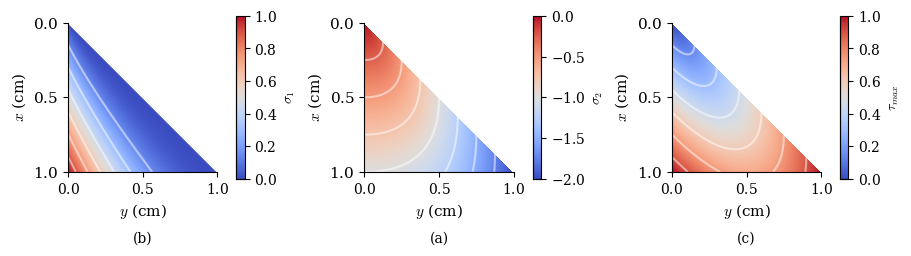

In [8]:
R = np.sqrt(((Z_sigma_xx-Z_sigma_yy)/2)**2 + Z_tau_xy**2)
C = (Z_sigma_xx + Z_sigma_yy)/2
Z_sigma_1 = C + R
Z_sigma_2 = C - R
Z_tau_max = R
# Graficar los esfuerzos
plt.figure(figsize=(9, 2.5))

plt.subplot(1, 3, 1)
plt.imshow(Z_sigma_1, cmap='coolwarm', origin='lower', extent=(0, 1, 0, 1))
plt.colorbar(label=r'$\sigma_{1}$')
plt.contour(X, Y, Z_sigma_1, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r'$y$ (cm)', fontsize=11)
plt.ylabel(r'$x$ (cm)', fontsize=11)
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.45, "(b)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()

plt.subplot(1, 3, 2)
plt.imshow(Z_sigma_2, cmap='coolwarm', origin='lower', extent=(0, 1, 0, 1))
plt.colorbar(label=r'$\sigma_{2}$')
plt.contour(X, Y, Z_sigma_2, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r'$y$ (cm)', fontsize=11)
plt.ylabel(r'$x$ (cm)', fontsize=11)
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.45, "(a)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()

plt.subplot(1, 3, 3)
plt.imshow(Z_tau_max, cmap='coolwarm', origin='lower', extent=(0, 1, 0, 1))
plt.colorbar(label=r'$\tau_{max}$')
plt.contour(X, Y, Z_tau_max, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r'$y$ (cm)', fontsize=11)
plt.ylabel(r'$x$ (cm)', fontsize=11)
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.45, "(c)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()
plt.savefig("esfuerzos_maximos.pdf", format="pdf", dpi=300)
plt.show()

Suponga que la presa se va a fabricar de concreto y se necesita identificar las zonas de la presa donde hay compresión y donde hay tracción. Grafique dichas zonas de manera diferenciada.

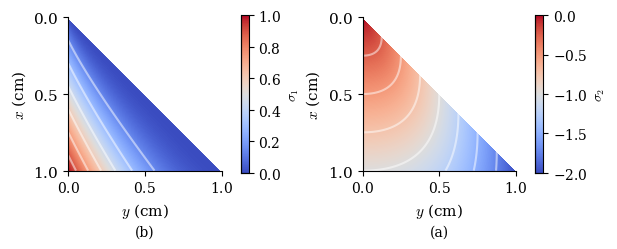

In [9]:
# Definir la función de la línea
from matplotlib.colors import LinearSegmentedColormap

def zona(x):
    return 2*x 

# Definir el rango de valores de x
x_v = np.linspace(0, 0.5, 1000)

# Calcular los valores de y correspondientes
y_v = 2*x_v 

# Graficar la línea verde


# Funciones para calcular los esfuerzos
def sigma_xx(gamma, x, y):
    return gamma * x - 2 * gamma * y

def sigma_yy(gamma, x):
    return -gamma * x

def tau_xy(gamma, y):
    return -gamma * y

# Definir el valor de gamma
gamma = 1

# Definir las coordenadas de los puntos del triángulo
points = [(0, 0), (1, 0), (1, 1)]

# Funciones para verificar si un punto está dentro del triángulo
def inside_triangle(x, y):
    return 0 <= x <= y and 0 <= y <= 1

# Crear una malla de puntos dentro del triángulo con una mayor resolución
x_values = np.linspace(0, 1, 1000)
y_values = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x_values, y_values)

# Crear una máscara booleana para ocultar los valores fuera del triángulo
mask = ~np.vectorize(inside_triangle)(X, Y)

# Calcular los valores de los esfuerzos en todos los puntos de la malla
Z_sigma_xx = sigma_xx(gamma, Y, X)
Z_sigma_yy = sigma_yy(gamma, Y)
Z_tau_xy = tau_xy(gamma, X)

R = np.sqrt(((Z_sigma_xx-Z_sigma_yy)/2)**2 + Z_tau_xy**2)
C = (Z_sigma_xx + Z_sigma_yy)/2
Z_sigma_1 = C + R
Z_sigma_2 = C - R
Z_tau_max = R

# Aplicar la máscara a los valores de los esfuerzos
Z_sigma_xx[mask] = np.nan
Z_sigma_yy[mask] = np.nan
Z_tau_xy[mask] = np.nan
Z_sigma_1[mask] = np.nan
Z_sigma_2[mask] = np.nan
Z_tau_max[mask] = np.nan
# Reemplazar los valores negativos con -1 y los positivos con 1
Z_sigma_1_filtered = np.where(Z_sigma_1 < 0, -1, 1).astype(float)
Z_sigma_1_filtered[mask] = np.nan
Z_sigma_2_filtered = np.where(Z_sigma_2 < 0, -1, 1).astype(float)
Z_sigma_2_filtered[mask] = np.nan
# Graficar la matriz resultante
# define color map 
# Define custom colormaps
# Define custom colormaps
red_colors = [(1, 0, 0, 1)] * 256  # Solid red color
blue_colors = [(0, 0, 1, 1)] * 256  # Solid blue color
cmap_red = LinearSegmentedColormap.from_list("CustomRed", red_colors)
cmap_blue = LinearSegmentedColormap.from_list("CustomBlue", blue_colors)

# Graficar los esfuerzos
plt.figure(figsize=(6,4))

plt.subplot(2, 2, 1)
plt.imshow(Z_sigma_1, cmap='coolwarm', origin='lower', extent=(0, 1, 0, 1))
plt.colorbar(label=r'$\sigma_{1}$')
plt.contour(X, Y, Z_sigma_1, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r'$y$ (cm)', fontsize=11)
plt.ylabel(r'$x$ (cm)', fontsize=11)
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.40, "(b)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()

plt.subplot(2, 2, 2)
plt.imshow(Z_sigma_2, cmap='coolwarm', origin='lower', extent=(0, 1, 0, 1))
plt.colorbar(label=r'$\sigma_{2}$')
plt.contour(X, Y, Z_sigma_2, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r'$y$ (cm)', fontsize=11)
plt.ylabel(r'$x$ (cm)', fontsize=11)
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.40, "(a)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()

plt.savefig("compresion_traccion_1.pdf", format="pdf", dpi=300)
plt.show()

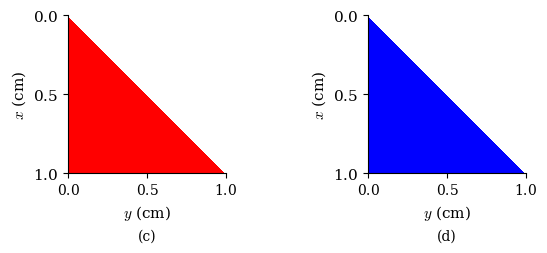

In [10]:
# Definir la función de la línea
from matplotlib.colors import LinearSegmentedColormap

def zona(x):
    return 2*x 

# Definir el rango de valores de x
x_v = np.linspace(0, 0.5, 1000)

# Calcular los valores de y correspondientes
y_v = 2*x_v 

# Graficar la línea verde


# Funciones para calcular los esfuerzos
def sigma_xx(gamma, x, y):
    return gamma * x - 2 * gamma * y

def sigma_yy(gamma, x):
    return -gamma * x

def tau_xy(gamma, y):
    return -gamma * y

# Definir el valor de gamma
gamma = 1

# Definir las coordenadas de los puntos del triángulo
points = [(0, 0), (1, 0), (1, 1)]

# Funciones para verificar si un punto está dentro del triángulo
def inside_triangle(x, y):
    return 0 <= x <= y and 0 <= y <= 1

# Crear una malla de puntos dentro del triángulo con una mayor resolución
x_values = np.linspace(0, 1, 1000)
y_values = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x_values, y_values)

# Crear una máscara booleana para ocultar los valores fuera del triángulo
mask = ~np.vectorize(inside_triangle)(X, Y)

# Calcular los valores de los esfuerzos en todos los puntos de la malla
Z_sigma_xx = sigma_xx(gamma, Y, X)
Z_sigma_yy = sigma_yy(gamma, Y)
Z_tau_xy = tau_xy(gamma, X)

R = np.sqrt(((Z_sigma_xx-Z_sigma_yy)/2)**2 + Z_tau_xy**2)
C = (Z_sigma_xx + Z_sigma_yy)/2
Z_sigma_1 = C + R
Z_sigma_2 = C - R
Z_tau_max = R

# Aplicar la máscara a los valores de los esfuerzos
Z_sigma_xx[mask] = np.nan
Z_sigma_yy[mask] = np.nan
Z_tau_xy[mask] = np.nan
Z_sigma_1[mask] = np.nan
Z_sigma_2[mask] = np.nan
Z_tau_max[mask] = np.nan
# Reemplazar los valores negativos con -1 y los positivos con 1
Z_sigma_1_filtered = np.where(Z_sigma_1 < 0, -1, 1).astype(float)
Z_sigma_1_filtered[mask] = np.nan
Z_sigma_2_filtered = np.where(Z_sigma_2 < 0, -1, 1).astype(float)
Z_sigma_2_filtered[mask] = np.nan
# Graficar la matriz resultante
# define color map 
# Define custom colormaps
# Define custom colormaps
red_colors = [(1, 0, 0, 1)] * 256  # Solid red color
blue_colors = [(0, 0, 1, 1)] * 256  # Solid blue color
cmap_red = LinearSegmentedColormap.from_list("CustomRed", red_colors)
cmap_blue = LinearSegmentedColormap.from_list("CustomBlue", blue_colors)

# Graficar los esfuerzos
plt.figure(figsize=(6,4))

plt.subplot(2, 2, 3)
plt.imshow(Z_sigma_1_filtered, cmap=cmap_red, origin='lower', extent=(0, 1, 0, 1))
#plt.colorbar(label=r'$\sigma_{1}$')
#plt.contour(X, Y, Z_sigma_1, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r'$y$ (cm)', fontsize=11)
plt.ylabel(r'$x$ (cm)', fontsize=11)
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.40, "(c)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()

plt.subplot(2, 2, 4)
plt.imshow(Z_sigma_2_filtered, cmap=cmap_blue, origin='lower', extent=(0, 1, 0, 1))
#plt.colorbar(label=r'$\sigma_{2}$')
#plt.contour(X, Y, Z_sigma_2, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r'$y$ (cm)', fontsize=11)
plt.ylabel(r'$x$ (cm)', fontsize=11)
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.40, "(d)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()
plt.savefig("compresion_traccion_2.pdf", format="pdf", dpi=300)
plt.show()

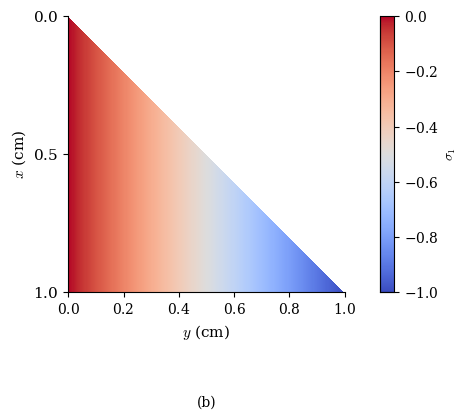

In [13]:
# Definir la función de la línea
from matplotlib.colors import LinearSegmentedColormap

def zona(x):
    return 2*x 

# Definir el rango de valores de x
x_v = np.linspace(0, 0.5, 1000)

# Calcular los valores de y correspondientes
y_v = 2*x_v 

# Graficar la línea verde


# Funciones para calcular los esfuerzos
def sigma_xx(gamma, x, y):
    return gamma * x - 2 * gamma * y

def sigma_yy(gamma, x):
    return -gamma * x

def tau_xy(gamma, y):
    return -gamma * y

# Definir el valor de gamma
gamma = 1

# Definir las coordenadas de los puntos del triángulo
points = [(0, 0), (1, 0), (1, 1)]

# Funciones para verificar si un punto está dentro del triángulo
def inside_triangle(x, y):
    return 0 <= x <= y and 0 <= y <= 1

# Crear una malla de puntos dentro del triángulo con una mayor resolución
x_values = np.linspace(0, 1, 1000)
y_values = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x_values, y_values)

# Crear una máscara booleana para ocultar los valores fuera del triángulo
mask = ~np.vectorize(inside_triangle)(X, Y)

# Calcular los valores de los esfuerzos en todos los puntos de la malla
Z_sigma_xx = sigma_xx(gamma, Y, X)
Z_sigma_yy = sigma_yy(gamma, Y)
Z_tau_xy = tau_xy(gamma, X)

R = np.sqrt(((Z_sigma_xx-Z_sigma_yy)/2)**2 + Z_tau_xy**2)
C = (Z_sigma_xx + Z_sigma_yy)/2
Z_sigma_1 = C + R
Z_sigma_2 = C - R
Z_tau_max = R

# Aplicar la máscara a los valores de los esfuerzos
Z_sigma_xx[mask] = np.nan
Z_sigma_yy[mask] = np.nan
Z_tau_xy[mask] = np.nan
Z_sigma_1[mask] = np.nan
Z_sigma_2[mask] = np.nan
Z_tau_max[mask] = np.nan
C[mask] = np.nan

# Reemplazar los valores negativos con -1 y los positivos con 1
Z_sigma_1_filtered = np.where(Z_sigma_1 < 0, -1, 1).astype(float)
Z_sigma_1_filtered[mask] = np.nan
Z_sigma_2_filtered = np.where(Z_sigma_2 < 0, -1, 1).astype(float)
Z_sigma_2_filtered[mask] = np.nan
# Graficar la matriz resultante
# define color map 
# Define custom colormaps
# Define custom colormaps
red_colors = [(1, 0, 0, 1)] * 256  # Solid red color
blue_colors = [(0, 0, 1, 1)] * 256  # Solid blue color
cmap_red = LinearSegmentedColormap.from_list("CustomRed", red_colors)
cmap_blue = LinearSegmentedColormap.from_list("CustomBlue", blue_colors)

# Graficar los esfuerzos
plt.figure(figsize=(6,4))

plt.imshow(C, cmap='coolwarm', origin='lower', extent=(0, 1, 0, 1))
plt.colorbar(label=r'$\sigma_{1}$')
#plt.contour(X, Y, Z_sigma_1, colors='white', linestyles='solid', alpha=0.5)
plt.gca().invert_yaxis()  # Invertir el eje y
plt.xlabel(r'$y$ (cm)', fontsize=11)
plt.ylabel(r'$x$ (cm)', fontsize=11)
plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
plt.text(0.5, -0.40, "(b)", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)  # Agregar etiqueta "a"
sns.despine()
#plt.savefig("compresion_traccion_1.pdf", format="pdf", dpi=300)
plt.show()

Analice la solución de esta presa y \textbf{argumente} si es posible cambiar las zonas de compresión y tracción identificadas previamente, mediante la variación de sus parámetros (altura $H$ y pero específico del fuido $\gamma$)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigma_xx(gamma, x, y):
    return gamma * x - 2 * gamma * y

def sigma_yy(gamma, x):
    return -gamma * x

def tau_xy(gamma, y):
    return -gamma * y

def plot_sigma_xx(H, gamma):
    # Definir las coordenadas de los puntos del triángulo
    points = [(0, 0), (H, 0), (H, H)]

    # Funciones para verificar si un punto está dentro del triángulo
    def inside_triangle(x, y):
        return 0 <= x <= y and 0 <= y <= H

    # Crear una malla de puntos dentro del triángulo con una mayor resolución
    x_values = np.linspace(0, H, 1000)
    y_values = np.linspace(0, H, 1000)
    X, Y = np.meshgrid(x_values, y_values)

    # Calcular los valores de los esfuerzos en todos los puntos de la malla
    # Calcular los valores de los esfuerzos en todos los puntos de la malla
    Z_sigma_xx = sigma_xx(gamma, Y, X)
    Z_sigma_yy = sigma_yy(gamma, Y)
    Z_tau_xy = tau_xy(gamma, X)
    R = np.sqrt(((Z_sigma_xx-Z_sigma_yy)/2)**2 + Z_tau_xy**2)
    C = (Z_sigma_xx + Z_sigma_yy)/2
    Z_sigma_1 = C - R
    Z_sigma_2 = C + R
    Z_tau_max = R

    

    # Reemplazar los valores negativos con -1 y los positivos con 1
    Z_sigma_xx_filtered = np.where(Z_sigma_xx < 0, -1, 1).astype(float)

    # Crear una máscara booleana para ocultar los valores fuera del triángulo
    mask = ~np.vectorize(inside_triangle)(X, Y)

    # Aplicar la máscara a los valores de los esfuerzos
    Z_sigma_xx[mask] = np.nan
    Z_sigma_xx_filtered[mask] = np.nan
    Z_sigma_yy[mask] = np.nan
    Z_tau_xy[mask] = np.nan

    R = np.sqrt(((Z_sigma_xx-Z_sigma_yy)/2)**2 + Z_tau_xy**2)
    C = (Z_sigma_xx + Z_sigma_yy)/2
    Z_sigma_1 = C - R
    Z_sigma_2 = C + R
    Z_tau_max = R

    # Definir el rango de valores de x
    x_v = np.linspace(0, H/2, 1000)
    
    # Calcular los valores de y correspondientes
    y_v = 2*x_v     
    
    # Graficar los esfuerzos
    plt.figure(figsize=(12, 6))
    # Graficar la matriz resultante
    plt.subplot(2, 3, 1)
    plt.imshow(Z_sigma_xx, cmap='coolwarm', origin='lower', extent=(0, H, 0, H))
    plt.colorbar(label=r'$\sigma_{xx}$')
    plt.contour(X, Y, Z_sigma_xx, colors='white', linestyles='solid', alpha=0.5)
    plt.gca().invert_yaxis()  # Invertir el eje y
    plt.xlabel(r'$y$ (cm)')
    plt.ylabel(r'$x$ (cm)')
    sns.despine()

    plt.subplot(2, 3, 2)
    plt.imshow(Z_sigma_yy, cmap='coolwarm', origin='lower', extent=(0, H, 0, H))
    plt.colorbar(label=r'$\sigma_{yy}$')
    plt.contour(X, Y, Z_sigma_yy, colors='white', linestyles='solid', alpha=0.5)
    plt.gca().invert_yaxis()  # Invertir el eje y
    plt.xlabel(r'$y$ (cm)')
    plt.ylabel(r'$x$ (cm)')
    sns.despine()
    
    plt.subplot(2, 3, 3)
    plt.imshow(Z_tau_xy, cmap='coolwarm', origin='lower', extent=(0, H, 0,H))
    plt.colorbar(label=r'$\tau_{xy}$')
    plt.contour(X, Y, Z_tau_xy, colors='white', linestyles='solid', alpha=0.5)
    plt.gca().invert_yaxis()  # Invertir el eje y
    plt.xlabel(r'$y$ (cm)')
    plt.ylabel(r'$x$ (cm)')
    sns.despine()
    
    plt.subplot(2, 3, 4)
    plt.imshow(Z_sigma_1, cmap='coolwarm', origin='lower', extent=(0, H, 0, H))
    plt.colorbar(label=r'$\sigma_{1}$')
    plt.contour(X, Y, Z_sigma_1, colors='white', linestyles='solid', alpha=0.5)
    plt.gca().invert_yaxis()  # Invertir el eje y
    plt.xlabel(r'$y$ (cm)')
    plt.ylabel(r'$x$ (cm)')
    sns.despine()
    
    plt.subplot(2, 3, 5)
    plt.imshow(Z_sigma_2, cmap='coolwarm', origin='lower', extent=(0, H, 0, H))
    plt.colorbar(label=r'$\sigma_{2}$')
    plt.contour(X, Y, Z_sigma_2, colors='white', linestyles='solid', alpha=0.5)
    plt.gca().invert_yaxis()  # Invertir el eje y
    sns.despine()
    plt.xlabel(r'$y$ (cm)')
    plt.ylabel(r'$x$ (cm)')

    plt.subplot(2, 3, 6)
    plt.imshow(Z_sigma_xx_filtered, cmap='coolwarm', origin='lower', extent=(0, H, 0, H))
    plt.plot(x_v,y_v, color='black', linestyle='-', linewidth=2)
    plt.xlim(0, H)
    plt.ylim(0, H)  # Establecer límite en el eje y
    #plt.colorbar(label=r'$\sigma_{xx}$')
    plt.gca().invert_yaxis()  # Invertir el eje y
    plt.xlabel(r'$y$ (cm)')
    plt.ylabel(r'$x$ (cm)')
    #plt.yticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
    #plt.xticks(np.arange(0, 1.1, 0.5), fontsize=11)  # Increase font size
    sns.despine()
    plt.tight_layout()
    plt.show()

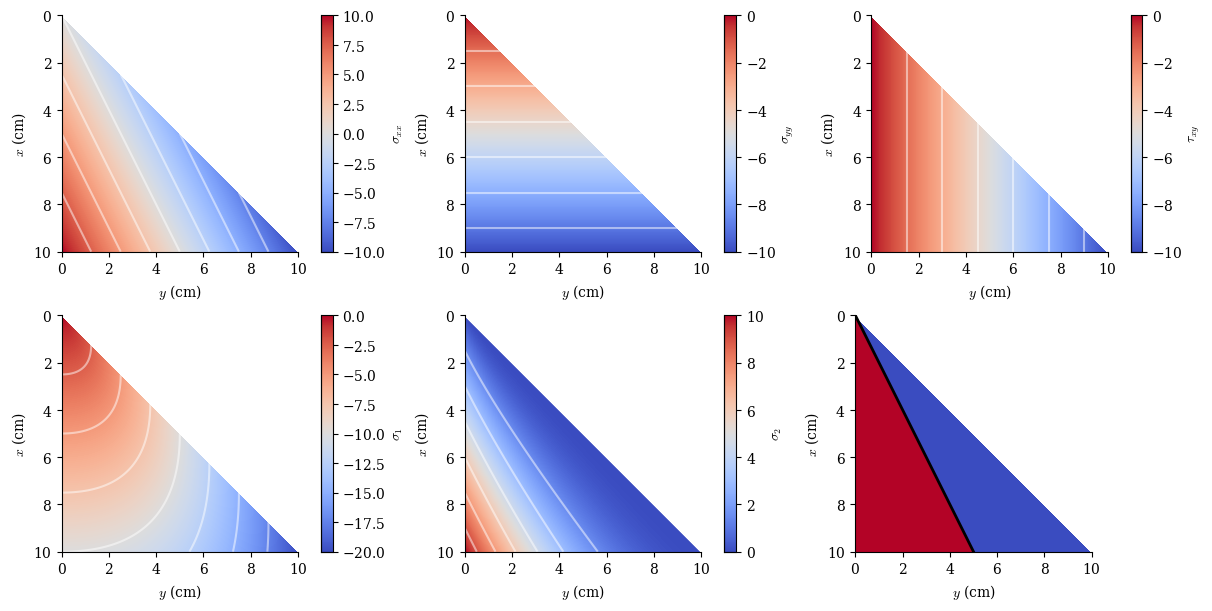

In [23]:
# Ejemplo de uso
H = 10
gamma = 1 #cemento
plot_sigma_xx(H, gamma)